In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def perculation_side(p, lattice=np.zeros((100, 100))):
    for i in range(lattice[0].size):
        for j in range(lattice[0].size):
            if random.random() < p:
                lattice[i][j] = 1
    return lattice

In [13]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
L = 30

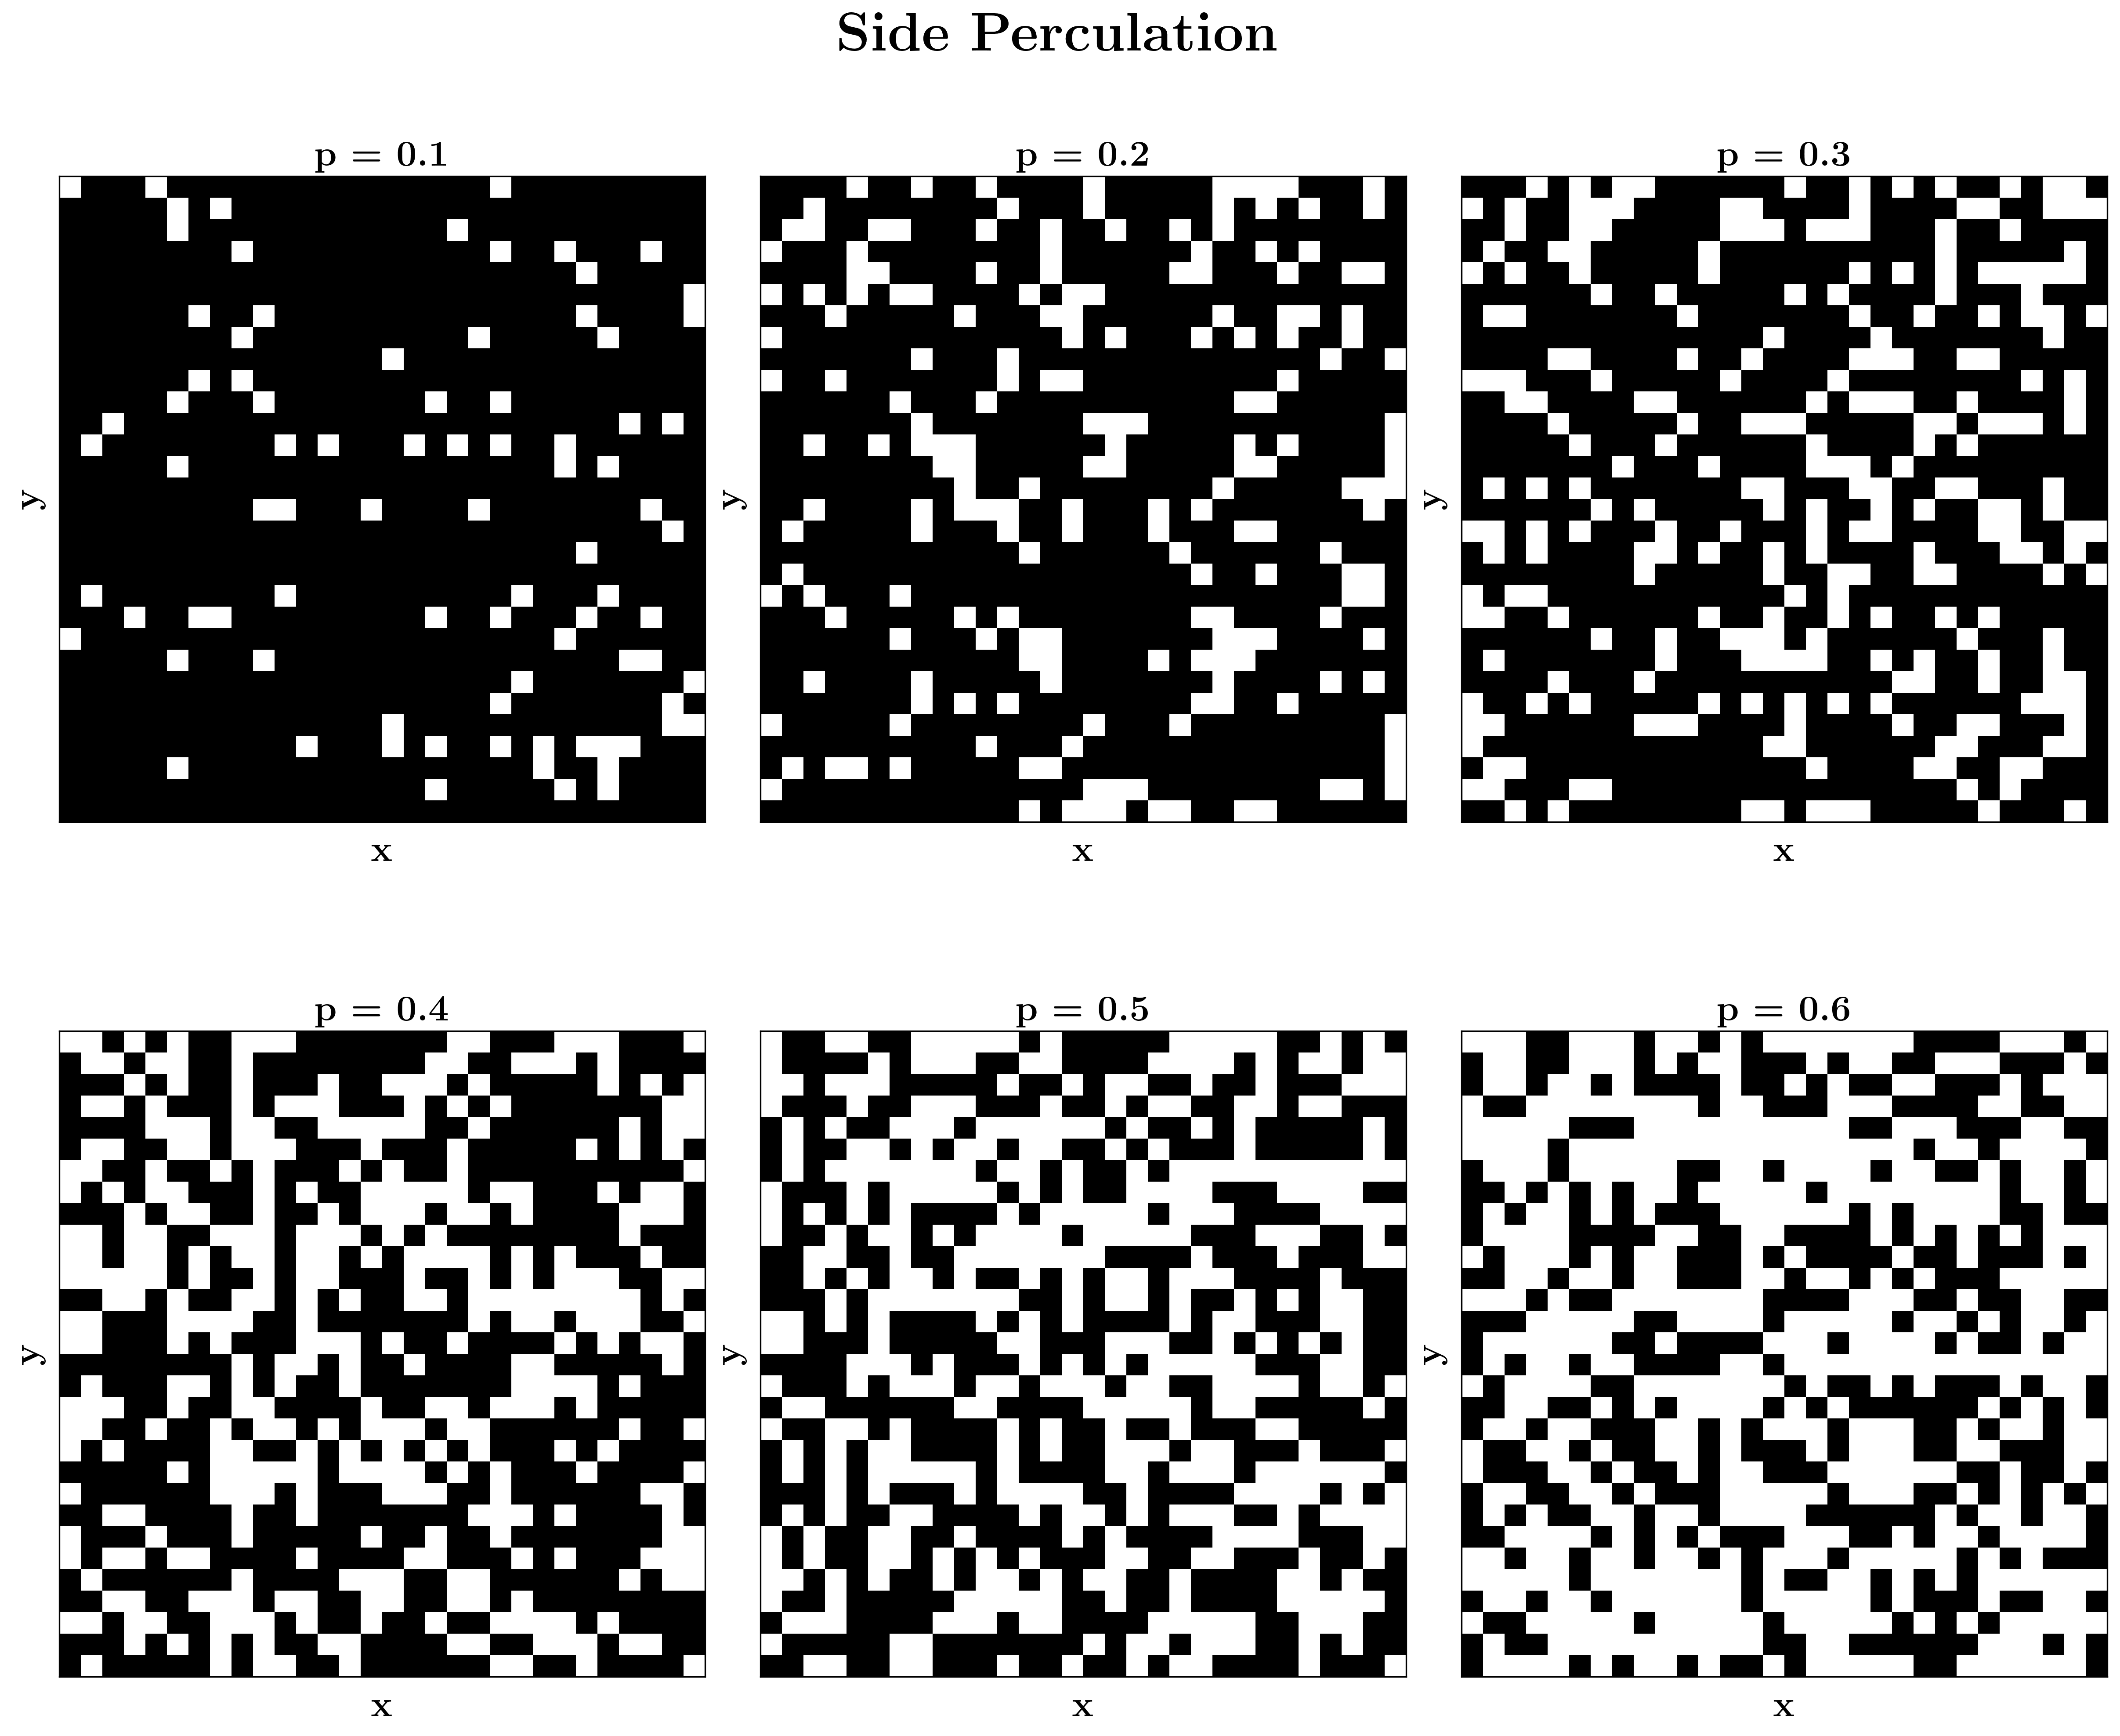

In [14]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(2, 3, figsize=(16, 14), dpi=300)
fig.suptitle(r"\textbf{Side Perculation}", fontsize=30)

for i in range(len(p)):
    ax[i // 3][i % 3].set_title(r"\textbf{p = " + str(p[i]) + "}", fontsize=20)
    ax[i // 3][i % 3].set_xlabel(r"\textbf{x}", fontsize=20)
    ax[i // 3][i % 3].set_ylabel(r"\textbf{y}", fontsize=20)
    ax[i // 3][i % 3].set_xticks([])
    ax[i // 3][i % 3].set_yticks([])
    ax[i // 3][i % 3].imshow(perculation_side(p[i], np.zeros((L, L))), cmap="gray")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig("perculation_side.png")
plt.show()


In [4]:
def count_clusters(matrix):
    def dfs(row, col):
        if row < 0 or row >= len(matrix) or col < 0 or col >= len(matrix[0]) or matrix[row][col] != 1:
            return
        matrix[row][col] = -1  # Mark the cell as visited
        for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            dfs(row + dr, col + dc)

    count = 0
    for row in range(len(matrix)):
        for col in range(len(matrix[0])):
            if matrix[row][col] == 1:
                count += 1
                dfs(row, col)

    # Reset marked cells back to 1
    for row in range(len(matrix)):
        for col in range(len(matrix[0])):
            if matrix[row][col] == -1:
                matrix[row][col] = 1

    return count

# Example usage:
matrix = [
    [1, 0, 1, 0, 0],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1],
]
num_clusters = count_clusters(matrix)
print("Number of clusters:", num_clusters)


Number of clusters: 5
